# Random walks and Monte Carlo Simulations

$$  ln{S_{t+1}/S_{t}}=drift \Delta {t}+\sigma {\sqrt {\Delta {t}}}Y_{i} $$

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

simulating a random walk using geometric brownian motion

In [2]:
def rw(u,sigma,iterations,no_of_years,steps_per_year=12,initial=100):
    delta_t=1/steps_per_year
    steps=int(no_of_years*steps_per_year)
    drift=u-(sigma**2/2)
    shock=np.random.normal(size=(steps+1,iterations)) # size like this more suitable for plotting purposes
    returns=drift*delta_t+sigma*np.sqrt(delta_t)*shock
    returns[0]=0 #setting initial level of all iterations same
    prices=initial*np.exp(returns.cumsum(axis=0))
    prices=pd.DataFrame(prices)
    return prices
    
    
    
    

In [3]:
p=rw(0.06,0.12,10,2,initial=1000)

In [4]:
p.head()

,0,1,2,3,4,5,6,7,8,9
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,991.220512,972.712186,948.409096,1033.197587,971.989649,1000.808684,973.916948,1006.667384,1034.608734,1058.396931
2,1063.329329,1057.522165,956.240692,979.950065,1030.458341,994.079769,945.361140,997.566274,1053.324234,983.415009
3,1051.752924,1069.341021,899.726361,962.754854,1021.809491,1019.975654,918.087135,934.212781,1134.508004,959.255571
4,1039.037871,1064.180004,832.843767,973.199902,1089.090831,937.488500,942.192590,958.601420,1126.801245,1097.063343


(0.0, 25.2)

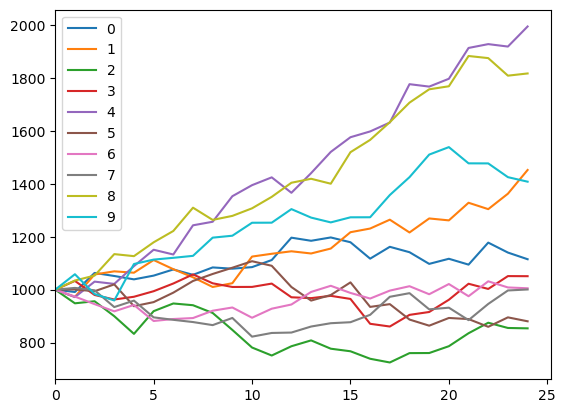

In [5]:
p.plot()
plt.xlim(left=0)

<Axes: >

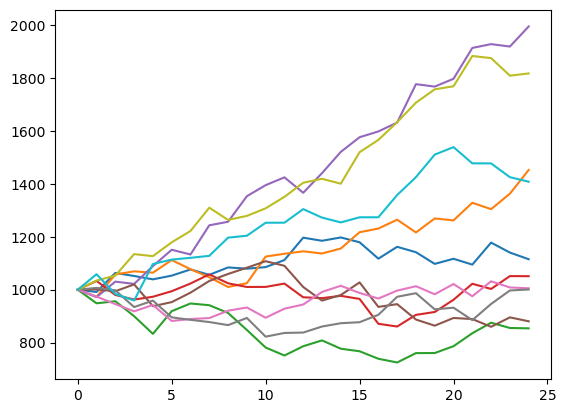

In [6]:
p.plot(legend=False)

In [7]:
import ipywidgets as widgets
from IPython.display import display

In [8]:
def gbm_plot(u,sigma,iterations,no_of_years):
    df=rw(u,sigma,iterations,no_of_years)
    df.plot(legend=False,figsize=(9,6))
    plt.axhline(y=100)
    plt.xlim(left=0)
    plt.show()


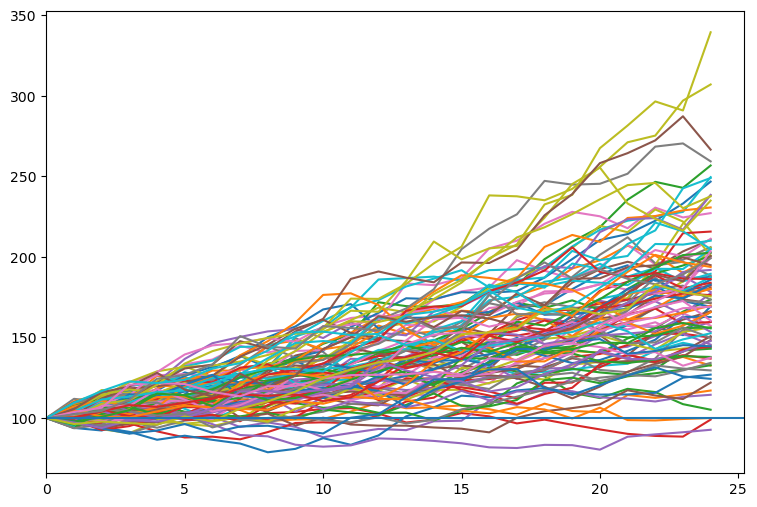

In [9]:
gbm_plot(0.3,0.15,100,2)

In [10]:
controls=widgets.interactive(gbm_plot,
                            u=(-0.2,0.5,0.01),
                            sigma=(0,0.5,0.01), #lower limit,upper limit and minimum step
                            iterations=(0,500,20),
                            no_of_years=1)

In [11]:
display(controls)

interactive(children=(FloatSlider(value=0.15000000000000002, description='u', max=0.5, min=-0.2, step=0.01), F…

# incorporating GBM and widgets into CPPI

In [12]:
%reload_ext autoreload
%autoreload 2
import CPPI as CPPI


In [13]:
def show_CPPI(u,sigma,iterations,no_of_years,riskfree_rate,multiplier,floor,steps_per_year=12,initial=100):
    delta_t=1/steps_per_year
    steps=int(no_of_years*steps_per_year)
    drift=u-(sigma**2/2)
    shock=np.random.normal(size=(steps+1,iterations)) 
    returns=drift*delta_t+sigma*np.sqrt(delta_t)*shock
    returns=pd.DataFrame(returns)
    CPPI.cppi(returns,riskfree_rate,multiplier,floor,initial) #attrinute cppi in module CPPI
 

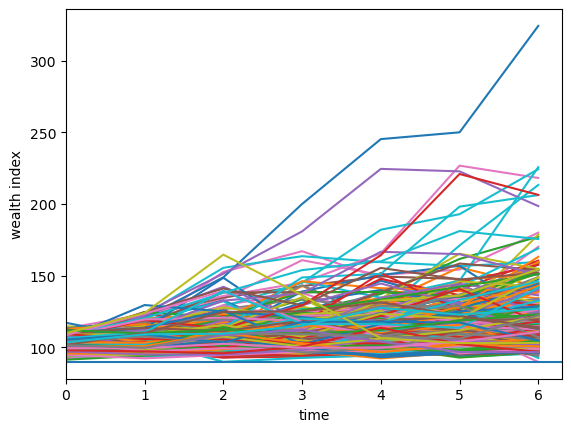

In [14]:
show_CPPI(0.15,0.5,400,0.5,0.03,3,0.9)


In [15]:
cppi_controls=widgets.interactive(show_CPPI,
                                  u=(-0.3,0.5,0.02),
                                  sigma=(0,0.5,0.02),
                                  iterations=(0,500,20),
                                  no_of_years=1,
                                  floor=(0.3,0.9,0.1),
                                  multiplier=(1,5,1),
                                  riskfree_rate=(0.02,0.12,0.01)
)
display(cppi_controls)

interactive(children=(FloatSlider(value=0.10000000000000003, description='u', max=0.5, min=-0.3, step=0.02), F…